# 0. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

In [2]:
# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("tab10") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [3]:
# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
print("library version check")
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)

library version check
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2


**attrition**

* 0: 재직
* 1: 퇴직

In [5]:
df = pd.read_csv("../data/hr_data_preprocessing.csv", encoding="utf-8", index_col=0)

In [6]:
df.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,...,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single
0,1980-07-20,2013,sales,single,2,3,8.33,9431500,8923739,8.0,...,1980,42,9,5.690003,0,0,1,0,0,1
1,1972-11-08,2011,rnd,married,3,1,6.93,5170672,4617495,2.0,...,1972,50,11,11.980024,0,1,0,0,1,0
2,1984-05-07,2014,rnd,single,2,2,9.00,9898200,9176045,6.0,...,1984,38,8,7.870003,0,1,0,0,0,1
3,1988-10-19,2013,rnd,married,2,2,8.33,5673500,5362476,1.0,...,1988,34,9,5.800007,0,1,0,0,1,0
4,1994-07-11,2015,rnd,married,2,1,7.20,3484080,3284389,9.0,...,1994,28,7,6.080005,0,1,0,0,1,0


In [7]:
df.shape

(1459, 21)

# 1. 시각화

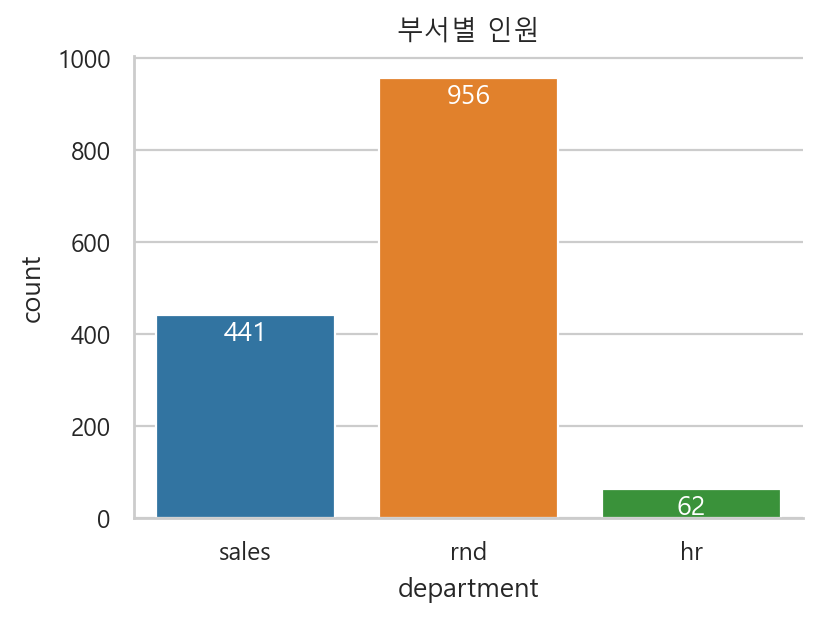

In [11]:
## seaborn으로 부서별 인원을 countplot으로 그려보자. 

fig, ax = plt.subplots(figsize=(4,3))

sns.countplot(data = df, 
              x = "department", 
              ax = ax)
ax.spines[["top", "right"]].set_visible(False)
ax.set_title("부서별 인원")

# 텍스트 넣기
feature = "department"
dep_dict = dict(df[feature].value_counts())
for p, k in zip(ax.patches, sorted(dep_dict, reverse=True)):
    x = p.get_x() + p.get_width()/2
    y = p.get_height()-40
    ax.annotate(dep_dict[k], (x, y), ha="center", va="center", color="white");


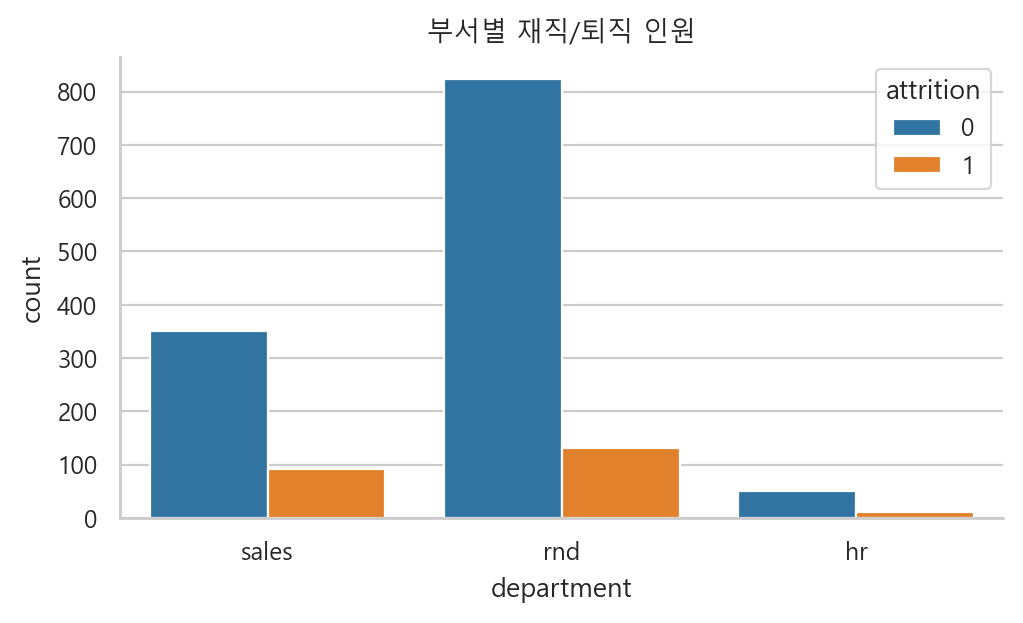

In [8]:
## seaborn으로 각 부서별로 퇴직자와 재직자의 countplot을 그리시오.

fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data = df, 
              x = "department", 
              hue="attrition")
ax.spines[["top", "right"]].set_visible(False)
ax.set_title("부서별 재직/퇴직 인원");

In [13]:
# 부서별 퇴직자와 재직자 비율을 crosstab을 이용해서 표현하시오.

pd.crosstab(df["department"], df["attrition"], normalize="index")

attrition,0,1
department,,
hr,0.822581,0.177419
rnd,0.861925,0.138075
sales,0.793651,0.206349


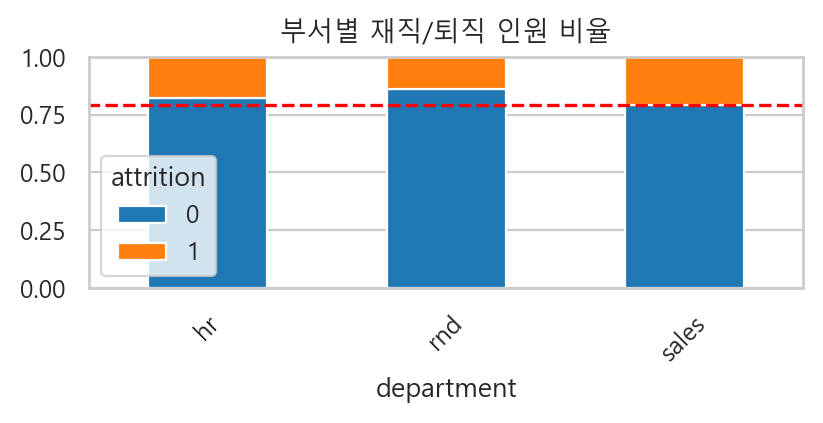

In [14]:
# 부서별 재직자와 퇴직자의 비율을 bar 차트로 그리시오.

fig, ax = plt.subplots(figsize=(4,2))
pd.crosstab(df["department"], 
            df["attrition"], 
            normalize="index").plot(kind = "bar", stacked=True, rot=45, ax=ax)
ax.set_ylim(0,1)
ax.plot([-2,5], [0.7936, 0.7936], color="red", ls = "--")
ax.set_title("부서별 재직/퇴직 인원 비율"); 

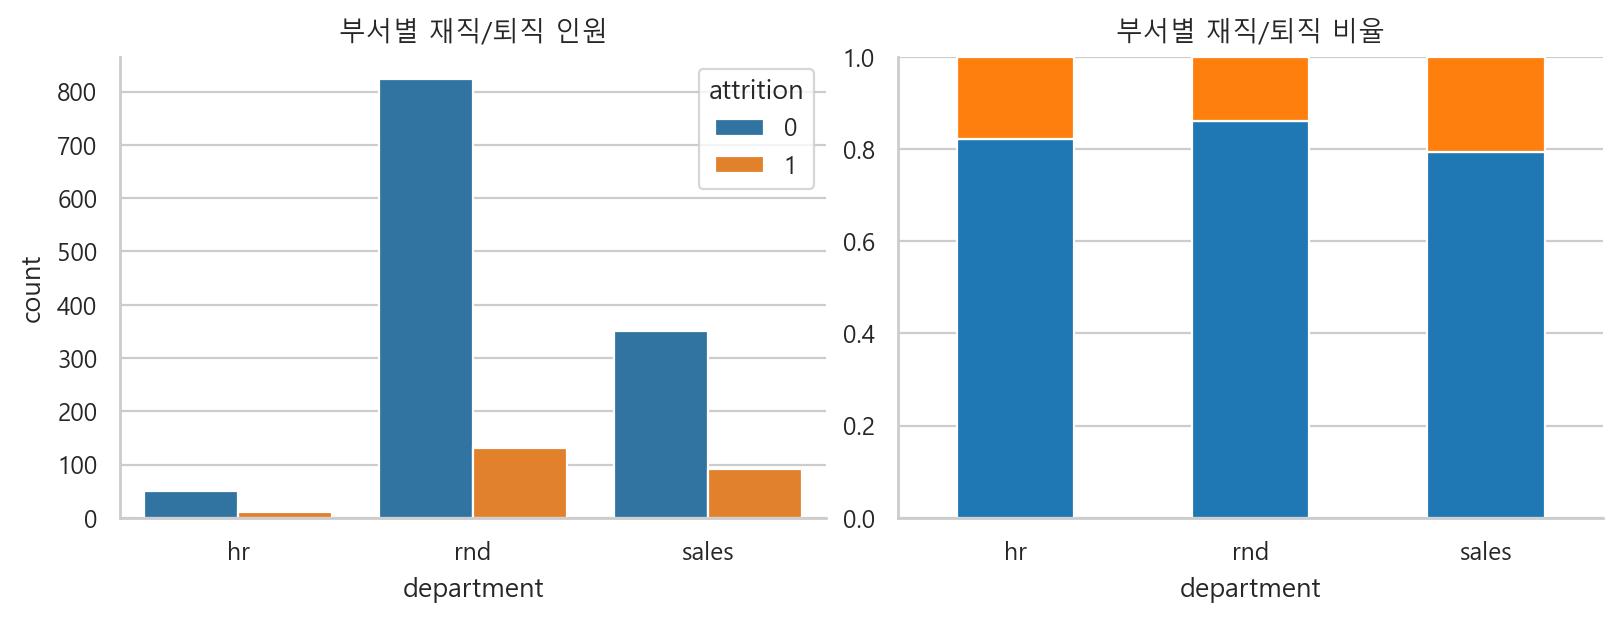

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

sns.countplot(data = df, 
              x = "department", 
              hue="attrition",
              order = ["hr", "rnd", "sales"],
              ax = ax1)
ax1.spines[["top", "right"]].set_visible(False)
ax1.set_title("부서별 재직/퇴직 인원")

pd.crosstab(df["department"], 
            df["attrition"], 
            normalize="index").plot(kind = "bar", 
                                    stacked=True, 
                                    rot=0, 
                                    ax=ax2)
ax2.set_ylim(0,1)
ax2.spines[["top", "right"]].set_visible(False)
ax2.set_title("부서별 재직/퇴직 비율")
ax2.get_legend().remove();

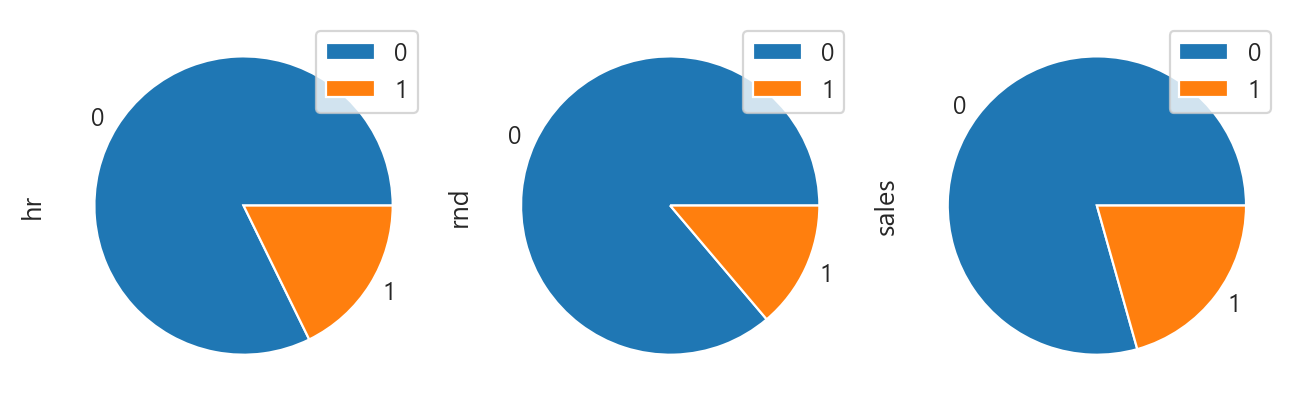

In [12]:
## 부서별 재직자와 퇴직자를 파이차트로 그려보자. 

fig, ax = plt.subplots(1, 3)
pd.crosstab(df["attrition"], 
            df["department"], 
            normalize="columns").plot(kind="pie", subplots=True, ax = ax);

In [13]:
# 부서별 급여
df.groupby(["department"])["salary"].mean()

department
hr       6.252758e+06
rnd      6.162250e+06
sales    6.088190e+06
Name: salary, dtype: float64

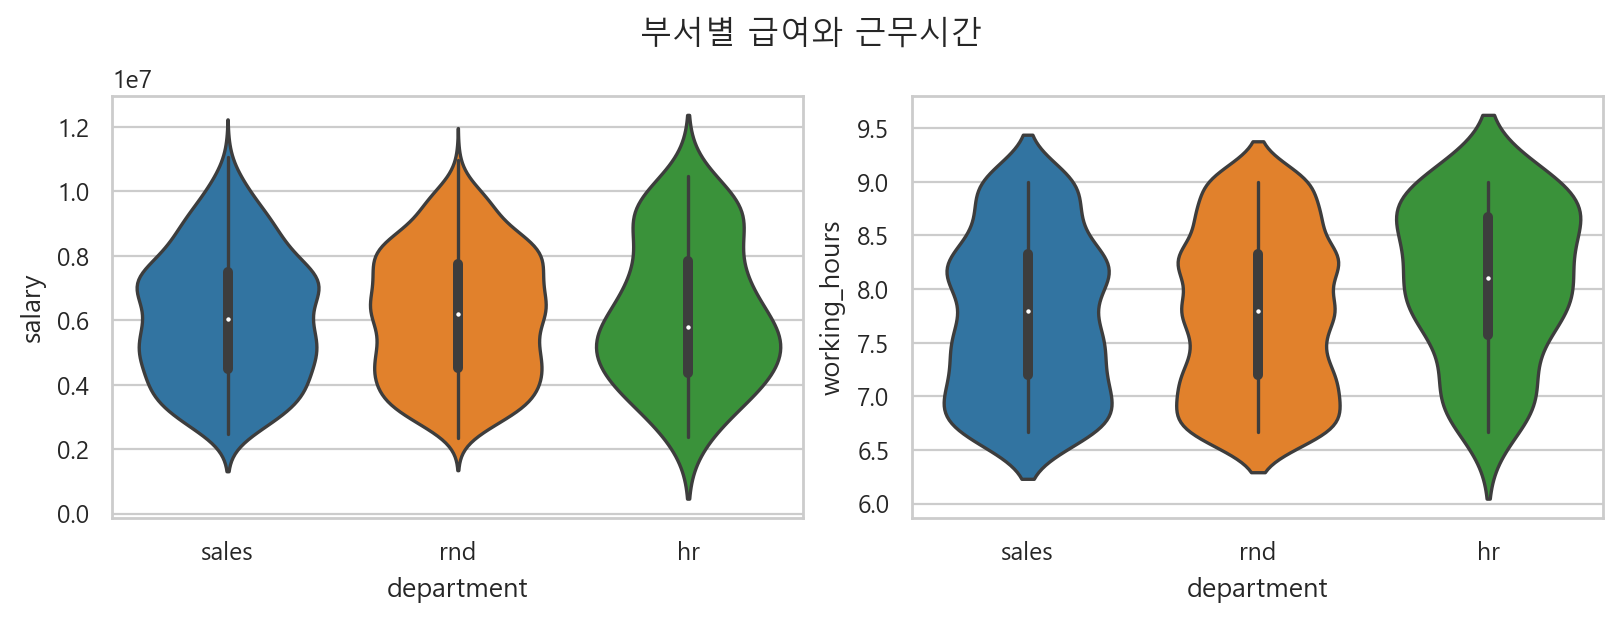

In [14]:
## 부서별 급여와 근무 시간을 violinplot으로 그려보자.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

sns.violinplot(data=df, x="department", y="salary", ax=ax1)
sns.violinplot(data=df, x="department", y="working_hours", ax=ax2)

fig.suptitle("부서별 급여와 근무시간");

In [16]:
print("최소연령: ", df["age"].min())
print("최대연령: ", df["age"].max())
print("최소연령 인원: ", sum(df["age"] == df["age"].min()))
print("60세 이상 인원: ", sum(df["age"] >= 60))

최소연령:  19
최대연령:  61
최소연령 인원:  8
60세 이상 인원:  15


In [17]:
def age_categorize(age):
    if 19 <= age < 30:
        age = 20
    elif 30 <= age < 50:
        age = (age//10)*10
    else:
        age = 50
    return age

In [18]:
df["age_category"] = df["age"].apply(age_categorize).astype("category")

In [20]:
df["age_category"].value_counts()

30    643
40    364
20    256
50    196
Name: age_category, dtype: int64

In [19]:
df["job_satisfaction"].value_counts()

3    458
2    438
0    285
1    278
Name: job_satisfaction, dtype: int64

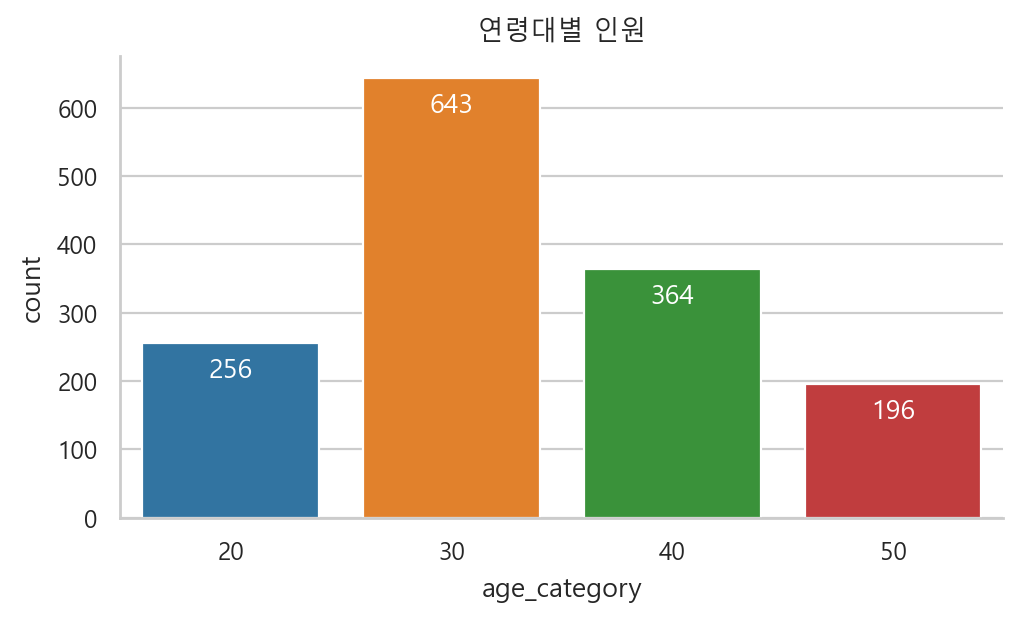

In [19]:
## seaborn으로 연령대별 countplot을 그려보자

fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data = df, 
              x = "age_category",
              ax = ax)
ax.spines[["top", "right"]].set_visible(False)
ax.set_title("연령대별 인원");

# 텍스트 넣기
feature = "age_category"
dep_dict = dict(df[feature].value_counts())
for p, k in zip(ax.patches, sorted(dep_dict)):
    x = p.get_x() + p.get_width()/2
    y = p.get_height()-40
    ax.annotate(dep_dict[k], (x, y), ha="center", va="center", color="white");

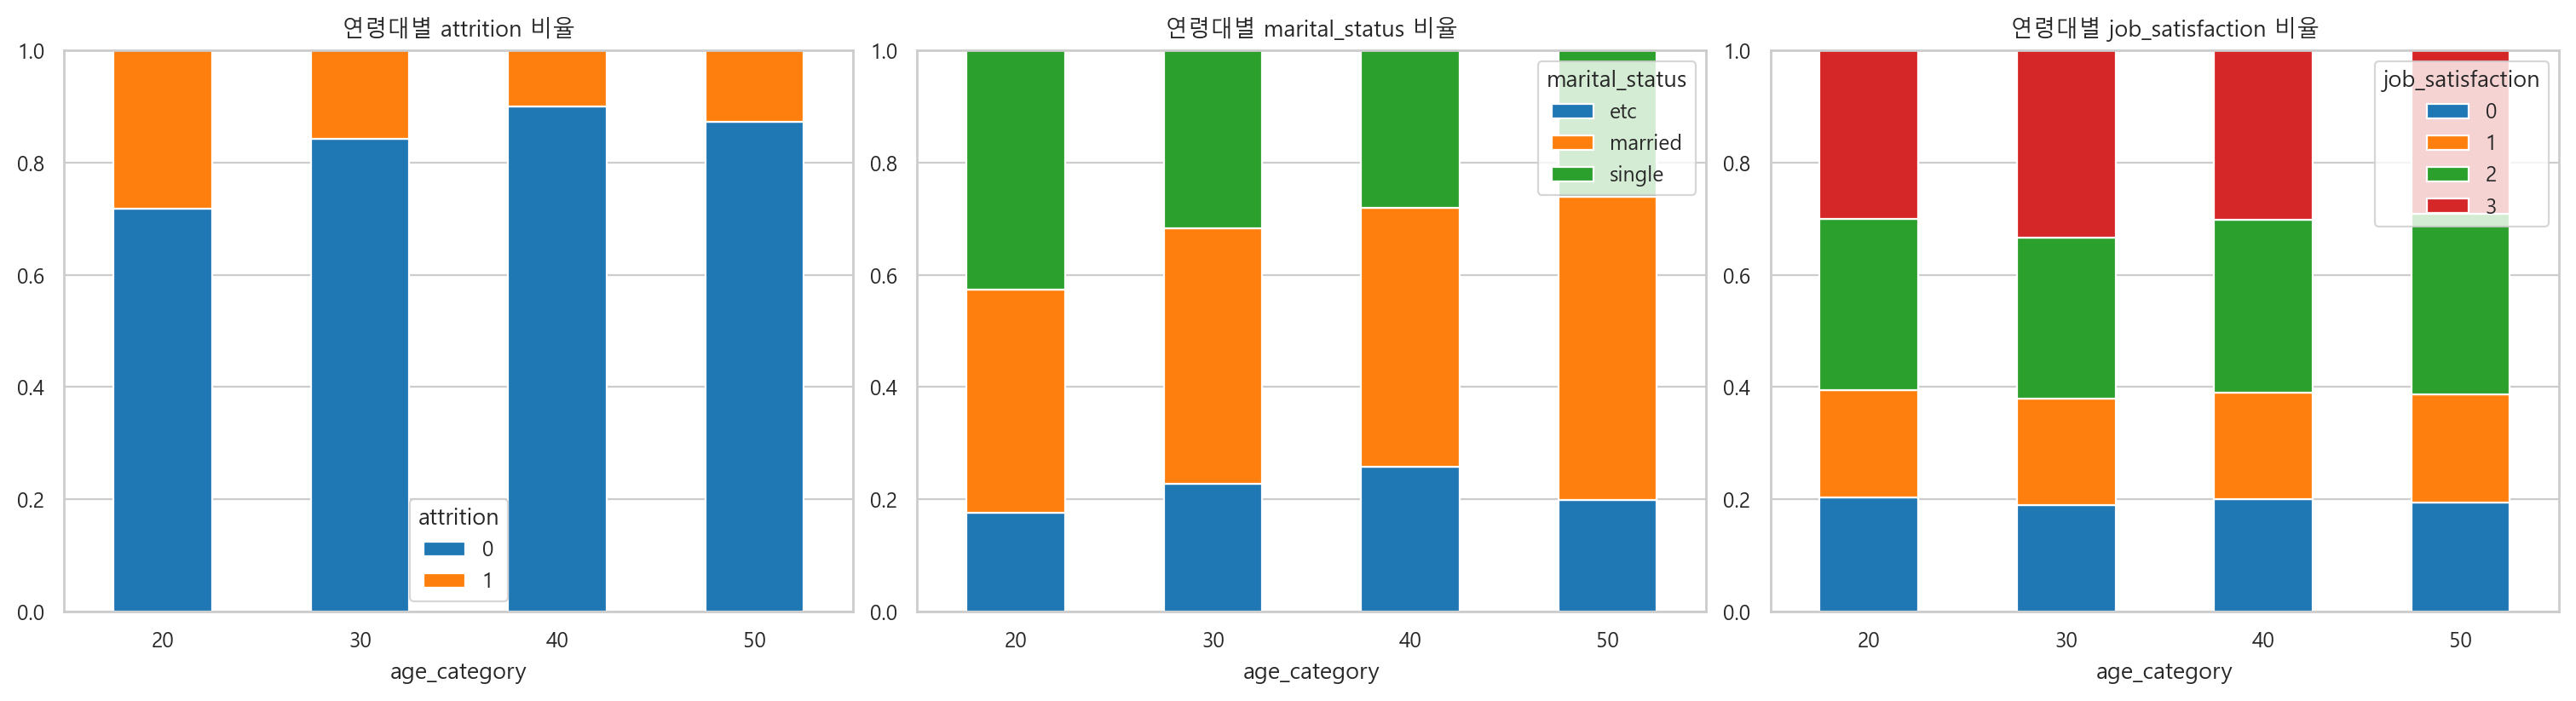

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

col_1 = ["age_category"]*3
col_2 = ["attrition", "marital_status", "job_satisfaction"]

for c_1, c_2, ax in zip(col_1, col_2, axes.flat):
    pd.crosstab(df[c_1], 
                df[c_2], 
                normalize='index').plot(kind="bar", 
                                        stacked=True, 
                                        rot=0, 
                                        ax=ax)
    ax.set_ylim(0,1)    
    ax.set_title(f"연령대별 {c_2} 비율");